# Validacao Cruzada com KNN e Iris Dataset

## Repetindo o que jah fizemos outras vezes

#### Carga de dados, split, instanciacao do knn, fit, predict

Basta acrescentar uma linha de codigo (predicao)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### Calcular a acuracia com metodo score(x de teste , y de teste) do modelo
Resultado: 0.9736842105263158

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(y_test, y_pred)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.9736842105263158


## Usando KFold do Scikit Learn

### Imprimir indices da divisao (Exemplo 1)

Vamos dividir o conjunto de treino com 2 splits

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# gerando dados ficticios
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3, 4, 5])

kf = KFold(n_splits = 2) #TODO definir a quantidade de splits (n_splits)
for train_index, test_index in kf.split(X): #TODO definir o conjunto de dados a ser dividido
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]


### Imprimir indices da divisao (Exemplo 2 - com shuffle)

Faremos novamente 2 splits

Utilizar os dados ficticios jah gerados (variavel X)

Ao instanciar o KFold, informe shuffle = True e um Random State (sugestao: 4312)

Observe a diferenca em relacao ao anterior

In [ ]:
kf = KFold(n_splits = 2, shuffle = True, random_state = 4312) #TODO adicionar parametros
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 3] TEST: [1 2 4]
TRAIN: [1 2 4] TEST: [0 3]


### Definir X_train, X_test, y_train, y_test em cada iteracao no laco

Utilizar os dados ficticios jah gerados (variavel X)

In [ ]:
f = KFold(n_splits = 2, shuffle = True, random_state = 4312) #TODO adicionar parametros (com shuffle e random state)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Calcular a acuracia para 5 particoes diferentes do Iris Dataset (com KNN)

KNeighborsClassifier(n_neighbors = 5)

n_splits = 5 (com shuffle)

Cuidado: Atualizar X e y antes de particionar (com os dados Iris)

Imprimir a acuracia com print(knn.score(....))

Resultados:

0.9666666666666667

0.9666666666666667

0.9666666666666667

0.9333333333333333

1.0

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
X = iris.data
y = iris.target
kf = KFold(n_splits = 5, shuffle = True, random_state = 4312)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
1.0


## Calcular a acuracia para 5 particoes diferentes

Utilizando a funcao cross_val_score

### Imports e modelo

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)

### Definindo a configuracao do experimento
Usar funcao cross_val_score(modelo, valores das features treino, valores dos rotulos para treino, cv=numerodeparticoes, scoring='accuracy')

Vamos fazer 5 particoes, ok?

Atribuir resultado a uma variavel

Imprima valor da variavel (sao 5 scores) e a media desses scores.

scores = [ 0.96666667  1.          0.93333333  0.96666667  1.        ]

mean = 0.973333333333



In [ ]:
scores = cross_val_score(knn, X, y, cv = 5, scoring = "accuracy")
print(scores)
print(scores.mean()) # Média

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


#### Gerar um grafico de linha para analisar o score medio com diversos valores de k

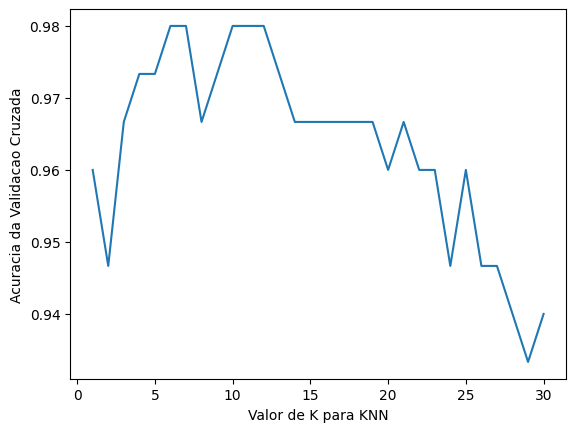

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# k variando de 1 a 30
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 5, scoring = "accuracy")
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acuracia da Validacao Cruzada')
plt.show()